# **Importing  the required modules**

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# **Loading the image**

Original image
Image format: None
Image mode: RGB
Image size: (512, 512)


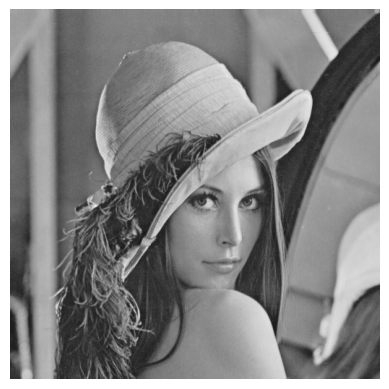

In [42]:
def load_image(filename):
    """Load an image from the file system.

    Args:
        filename (str): The path to the image file.

    Returns:
        PIL.Image.Image: The loaded image.
    """
    return Image.open(filename).convert('RGB')

def show_image(image):
    """Display the given image.

    Args:
        image (PIL.Image.Image): The image to display.
    """
    print("Image format:", image.format)
    print("Image mode:", image.mode)
    print("Image size:", image.size)

    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()
        
image = load_image('image.png')
print("Original image")
show_image(image)

In [3]:
# # scale the image to 80% pixels if the image is too big
# image = image.resize((int(image.size[0]*0.2), int(image.size[1]*0.2)))
# show_image(image)

# **Edge Detection**

In [39]:
def apply_filter(image, kernel):
    """Apply filter to the input image using the given kernel.

    Args:
        image (PIL.Image.Image): The input image to apply filter to.
        kernel (list of lists): The filter kernel.

    Returns:
        PIL.Image.Image: The filtered image.
    """
    width, height = image.size
    filtered_image = Image.new("RGB", (width, height))  
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            pixel = [0, 0, 0]  
            for i in range(3):
                for j in range(3):
                    try:
                        pixel_value = image.getpixel((x + i - 1, y + j - 1))
                        if isinstance(pixel_value, int):  
                            pixel_value = (pixel_value, pixel_value, pixel_value)
                        pixel[0] += pixel_value[0] * kernel[i][j]  # Update R channel
                        pixel[1] += pixel_value[1] * kernel[i][j]  # Update G channel
                        pixel[2] += pixel_value[2] * kernel[i][j]  # Update B channel
                    except IndexError:
                        pass
            filtered_image.putpixel((x, y), (pixel[0] // 16, pixel[1] // 16, pixel[2] // 16))  
    return filtered_image

## **Vertical**

Original image
Image format: None
Image mode: RGB
Image size: (512, 512)


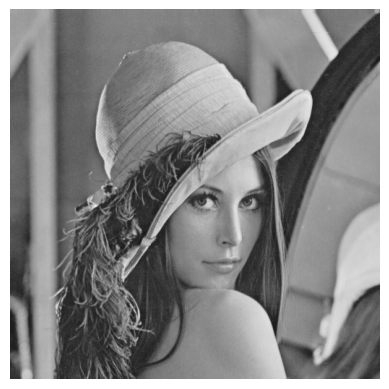

Applying vertical filter for edge detection
Image format: None
Image mode: RGB
Image size: (512, 512)


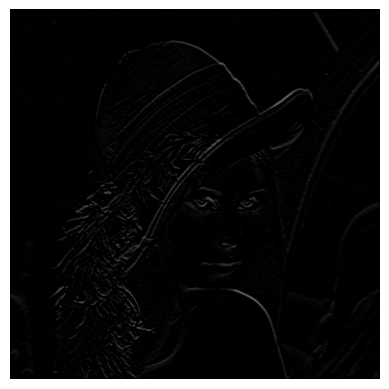

In [40]:
vertical_filter = [
    [-4, 0, 4],
    [-8, 0, 8],
    [-4, 0, 4]
]

# Apply vertical filter for edge detection
print("Original image")
show_image(image)
print("Applying vertical filter for edge detection")
image_vertical_filter = apply_filter(image, vertical_filter)
show_image(image_vertical_filter)

## **Horizontal**

Original image
Image format: None
Image mode: RGB
Image size: (512, 512)


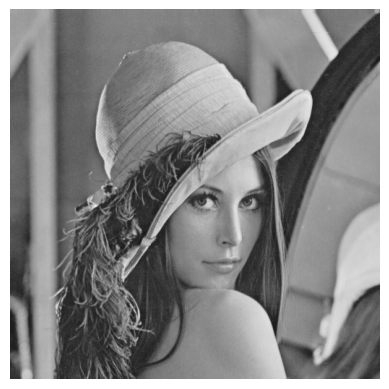

Applying horizontal filter for edge detection
Image format: None
Image mode: RGB
Image size: (512, 512)


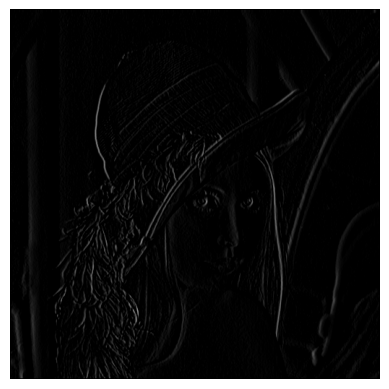

In [41]:
horizontal_filter = [
    [-4, -8, -4],
    [0, 0, 0],
    [4, 8, 4]
]

# Apply horizontal filter for edge detection
print("Original image")
show_image(image)
print("Applying horizontal filter for edge detection")
image_horizontal_filter = apply_filter(image, horizontal_filter)
show_image(image_horizontal_filter)

# **Convolution**

Original image
Image format: None
Image mode: RGB
Image size: (512, 512)


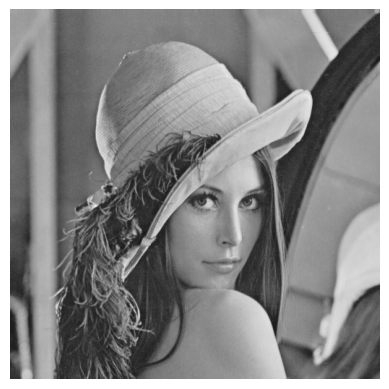

Applying convolution filter
Image format: None
Image mode: RGB
Image size: (512, 512)


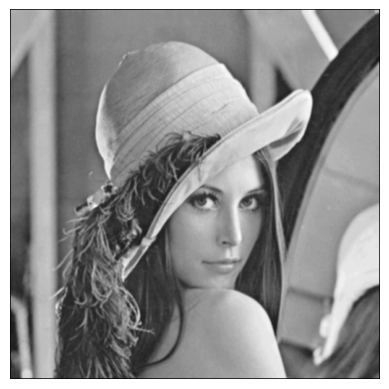

In [38]:
def apply_convolution(image, kernel):
    """Apply convolution operation to the input image using the given kernel.

    Args:
        image (PIL.Image.Image): The input image to apply convolution to.
        kernel (list of lists): The convolution kernel.

    Returns:
        PIL.Image.Image: The filtered image after applying convolution.
    """
    width, height = image.size
    filtered_image = Image.new("RGB", (width, height))
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            pixel = [0, 0, 0]  
            for i in range(3):
                for j in range(3):
                    try:
                        pixel_value = image.getpixel((x + i - 1, y + j - 1))
                        if isinstance(pixel_value, int):  
                            pixel_value = (pixel_value, pixel_value, pixel_value)
                        pixel[0] += int(pixel_value[0] * kernel[i][j])  # Update R channel
                        pixel[1] += int(pixel_value[1] * kernel[i][j])  # Update G channel
                        pixel[2] += int(pixel_value[2] * kernel[i][j])  # Update B channel
                    except IndexError:
                        pass
            pixel = [max(0, min(255, value)) for value in pixel]
            filtered_image.putpixel((x, y), tuple(pixel))
    return filtered_image

blur_kernel = [
    [1/9, 1/9, 1/9],
    [1/9, 2/9, 1/9],
    [1/9, 1/9, 1/9]
]

print("Original image")
show_image(image)
print("Applying convolution filter")
image_filter = apply_convolution(image, blur_kernel)
show_image(image_filter)


# **Padding**

## **Zero Padding**

Original image
Image format: None
Image mode: RGB
Image size: (512, 512)


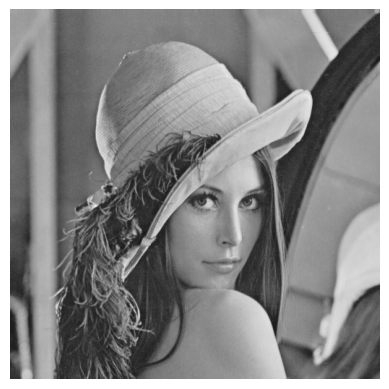

Applying zero padding
Image format: None
Image mode: RGB
Image size: (532, 532)


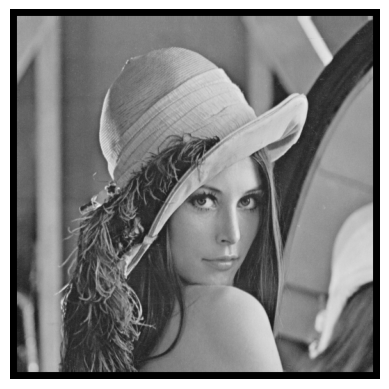

In [37]:
def apply_zero_padding(image, pad_width):
    """Apply zero padding to the input image.

    Args:
        image (PIL.Image.Image): The input image to apply zero padding to.
        pad_width (int): The width of the padding.

    Returns:
        PIL.Image.Image: The image with zero padding applied.
    """
    width, height = image.size
    image_matrix = list(image.getdata())
    padded_matrix = [[(0, 0, 0)] * (width + 2 * pad_width) for _ in range(height + 2 * pad_width)]

    for i in range(height):
        for j in range(width):
            padded_matrix[i + pad_width][j + pad_width] = image_matrix[i * width + j]

    padded_image = Image.new('RGB', (width + 2 * pad_width, height + 2 * pad_width), 'white')
    padded_image.putdata([pixel for row in padded_matrix for pixel in row])

    return padded_image

# Apply zero padding
print("Original image")
show_image(image)
print("Applying zero padding")
image_zero_padding = apply_zero_padding(image, 10)
show_image(image_zero_padding)

## **Extended Padding**

Original image
Image format: None
Image mode: RGB
Image size: (512, 512)


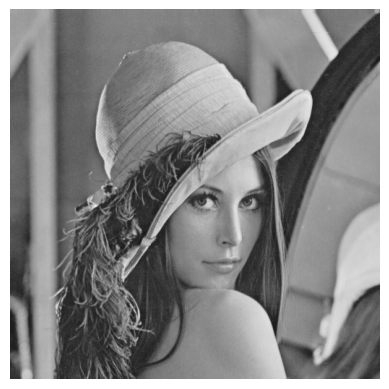

Applying extended padding
Image format: None
Image mode: RGB
Image size: (552, 552)


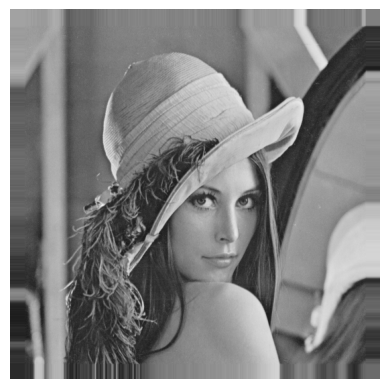

In [36]:
def apply_extended_padding(image, pad_width):
    """Apply extended padding to the input image.

    Args:
        image (PIL.Image.Image): The input image to apply extended padding to.
        pad_width (int): The width of the padding.

    Returns:
        PIL.Image.Image: The image with extended padding.
    """
    width, height = image.size
    pixels = image.load()
    extended_image = Image.new('RGB', (width + 2 * pad_width, height + 2 * pad_width), 'white')
    extended_pixels = extended_image.load()
    
    # Copy the original image to the center of the extended image
    for y in range(height):
        for x in range(width):
            extended_pixels[x + pad_width, y + pad_width] = pixels[x, y]
    
    # Extend the top and bottom borders
    for x in range(width):
        for y in range(pad_width):
            extended_pixels[x + pad_width, y] = pixels[x, 0]  # Copy top border
            extended_pixels[x + pad_width, height + pad_width + y] = pixels[x, height - 1]  # Copy bottom border
    
    # Extend the left and right borders
    for y in range(height + 2 * pad_width):
        for x in range(pad_width):
            extended_pixels[x, y] = extended_pixels[pad_width, y]  # Copy left border
            extended_pixels[width + pad_width + x, y] = extended_pixels[width + pad_width - 1, y]  # Copy right border
    
    return extended_image

# Apply extended padding
extended_image = apply_extended_padding(image, 20)
print("Original image")
show_image(image)
print("Applying extended padding")
show_image(extended_image)

# **Max Pooling & Stride Length**

Original Image:
Image format: None
Image mode: RGB
Image size: (512, 512)


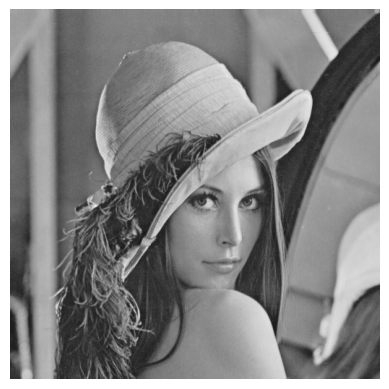

Max Pooled Image:
Image format: None
Image mode: RGB
Image size: (509, 509)


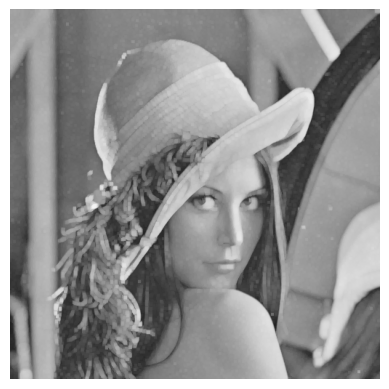

In [35]:
def apply_max_pooling(image, pool_size, stride):
    """Applies max pooling to the input image.

    Args:
        image (PIL.Image.Image): The input image to apply max pooling to.
        pool_size (int): The size of the pooling window.
        stride (int): The stride of the pooling operation.

    Returns:
        PIL.Image.Image: The pooled image.
    """
    image_width, image_height = image.size
    
    output_width = (image_width - pool_size) // stride + 1
    output_height = (image_height - pool_size) // stride + 1
    pooled_image = Image.new('RGB', (output_width, output_height))
    
    for y in range(0, output_height):
        for x in range(0, output_width):
            region = image.crop((x * stride, y * stride, x * stride + pool_size, y * stride + pool_size))
            pooled_image.putpixel((x, y), max(region.getdata()))
    
    return pooled_image

# Apply max pooling
max_pooled_image = apply_max_pooling(image, pool_size=4, stride=1)
print("Original Image:")
show_image(image)
print("Max Pooled Image:")
show_image(max_pooled_image)